In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../Data/Speed Dating Data.csv', encoding = "ISO-8859-1", engine='python')
pd.set_option("display.max_columns", None)
data

,iid,id,gender,idg,condtn,wave,Number of people met,station met,start station,order,partner,pid,match,interest level,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0

In [4]:
females_ = data[data['gender'] == 0]

In [5]:
def age_ethnicity(data):
    copy_data = data.copy()
    bins = [18,30,40,50,60,70,100]
    labels = ['18-29','30-39', '40-49', '50-59', '60-69', '70+']
    copy_data['agerange'] = pd.cut(copy_data.age, bins, labels = labels,include_lowest = True)
    rm_dupes = copy_data.drop_duplicates('iid').groupby(['race','agerange'])['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max']).dropna()
    ethnicity = rm_dupes.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
    return ethnicity

a_e_f = age_ethnicity(females_)
a_e_f

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1               \
                                                     mean    min   max   
race                                  agerange                           
Black/African American                18-29     20.002308  10.00  50.0   
                                      30-39     16.526667  14.58  20.0   
European/Caucasian-American           18-29     18.269274   5.00  50.0   
                                      30-39     14.406875   5.00  25.0   
Latino/Hispanic American              18-29     18.270909   0.00  50.0   
                                      30-39     26.666667  10.00  40.0   
Asian/Pacific Islander/Asian-American 18-29     17.654615   5.00  90.0   
                                      30-39     14.444000   2.00  25.0   
                                      50-59     25.000000  25.00  25.0   
Other                                 18-29     18.682667   5.00  50.0   

                                                  sinc1_1               \
                                                     mean   min    max   
race                                  agerange                           
Black/African American                18-29     15.791538   5.0  21.74   
                                      30-39     17.223333  15.0  20.00   
European/Caucasian-American           18-29     17.409194   0.0  40.00   
                                      30-39     19.000625   5.0  25.00   
Latino/Hispanic American              18-29     17.767727  10.0  25.00   
                                      30-39     25.666667  15.0  32.00   
Asian/Pacific Islander/Asian-American 18-29     19.128923   0.0  47.00   
                                      30-39     28.478000  15.0  60.00   
                                      50-59      0.000000   0.0   0.00   
Other                                 18-29     18.650625   3.0  35.00   

                                                 intel1_1               \
                                                     mean   min    max   
race                                  agerange                           
Black/African American                18-29     18.823846  10.0  35.00   
                                      30-39     18.610000  15.0  20.83   
European/Caucasian-American           18-29     21.211935   5.0  50.00   
                                      30-39     21.813125  10.0  45.00   
Latino/Hispanic American              18-29     22.119545  10.0  35.00   
                                      30-39     25.000000  20.0  30.00   
Asian/Pacific Islander/Asian-American 18-29     20.523385   2.0  50.00   
                                      30-39     18.478000  10.0  30.00   
                                      50-59     25.000000  25.0  25.00   
Other                                 18-29     21.145625  10.0  50.00   

                                                   fun1_1               \
                                                     mean   min    max   
race                                  agerange                           
Black/African American                18-29     17.676154  10.0  30.00   
                                      30-39     17.916667  15.0  20.00   
European/Caucasian-American           18-29     18.210645   5.0  40.00   
                                      30-39     15.985000   8.0  25.00   
Latino/Hispanic American              18-29     17.026818  10.0  35.00   
                                      30-39      7.333333   5.0  12.00   
Asian/Pacific Islander/Asian-American 18-29     16.688769   0.0  30.00   
                                      30-39     13.078000   8.0  17.39   
                                      50-59     25.000000  25.0  25.00   
Other                                 18-29     16.518125   5.0  30.00   

                                                   amb1_1               \
                                                     mean   min    max   
race                                  agerange    

Text(0.5, 0, 'Points out of 100')

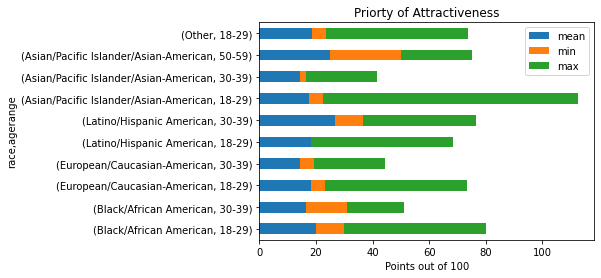

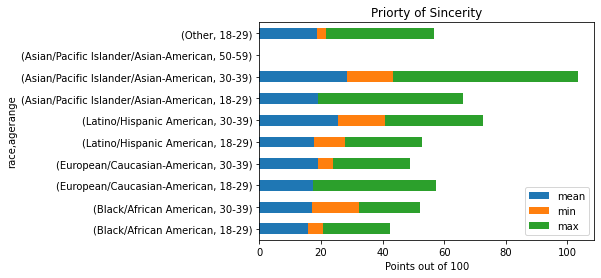

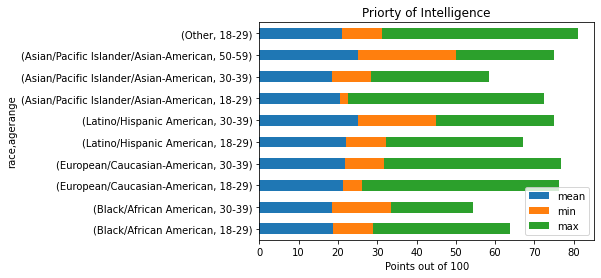

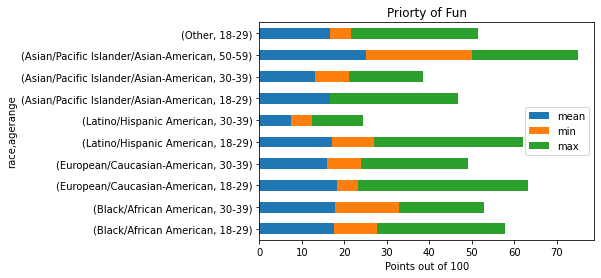

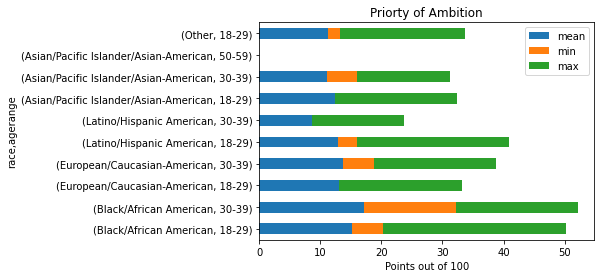

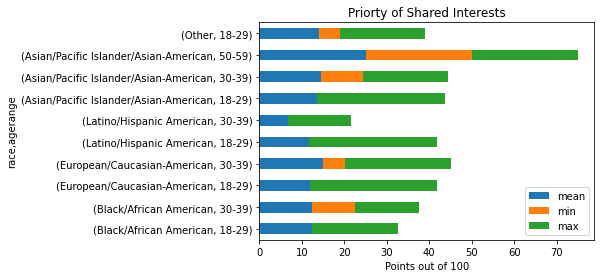

In [6]:
a_e_f.plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priorty of Attractiveness").set_xlabel('Points out of 100')
a_e_f.plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priorty of Sincerity").set_xlabel('Points out of 100')
a_e_f.plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priorty of Intelligence").set_xlabel('Points out of 100')
a_e_f.plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priorty of Fun").set_xlabel('Points out of 100')
a_e_f.plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priorty of Ambition").set_xlabel('Points out of 100')
a_e_f.plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priorty of Shared Interests").set_xlabel('Points out of 100')


In [7]:
males_ = data[data['gender'] == 1]
a_e_m = age_ethnicity(males_)
a_e_m

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1                 \
                                                     mean    min     max   
race                                  agerange                             
Black/African American                18-29     25.700000  16.00   40.00   
European/Caucasian-American           18-29     28.652378   6.67  100.00   
                                      30-39     25.570000  10.00   50.00   
                                      40-49     23.810000  23.81   23.81   
Latino/Hispanic American              18-29     25.446250  10.00   75.00   
                                      30-39     20.000000  20.00   20.00   
Asian/Pacific Islander/Asian-American 18-29     26.221833   7.00   80.00   
                                      30-39     19.550000  15.00   30.00   
Other                                 18-29     26.554706  10.00   55.00   
                                      30-39     20.250000  19.00   22.00   

                                                  sinc1_1                \
                                                     mean    min    max   
race                                  agerange                            
Black/African American                18-29     17.800000  10.00  25.00   
European/Caucasian-American           18-29     15.221538   0.00  40.00   
                                      30-39     13.981765   0.00  20.00   
                                      40-49     23.810000  23.81  23.81   
Latino/Hispanic American              18-29     16.841875   5.00  25.00   
                                      30-39     20.000000  20.00  20.00   
Asian/Pacific Islander/Asian-American 18-29     18.745424   5.00  40.00   
                                      30-39     17.534000  10.00  30.00   
Other                                 18-29     17.358235   0.00  30.00   
                                      30-39     17.750000  10.00  22.00   

                                                 intel1_1                \
                                                     mean    min    max   
race                                  agerange                            
Black/African American                18-29     20.500000  18.00  25.00   
European/Caucasian-American           18-29     19.959790   0.00  42.86   
                                      30-39     21.922941  10.00  40.00   
                                      40-49     23.810000  23.81  23.81   
Latino/Hispanic American              18-29     20.352500   5.00  35.00   
                                      30-39     20.000000  20.00  20.00   
Asian/Pacific Islander/Asian-American 18-29     16.821833   0.00  30.00   
                                      30-39     16.350000  10.00  20.00   
Other                                 18-29     19.652353   1.00  30.00   
                                      30-39     21.000000  15.00  30.00   

                                                   fun1_1                \
                                                     mean    min    max   
race                                  agerange                            
Black/African American                18-29     17.000000  10.00  20.00   
European/Caucasian-American           18-29     18.102797   0.00  50.00   
                                      30-39     17.511176   5.00  30.00   
                                      40-49     23.810000  23.81  23.81   
Latino/Hispanic American              18-29     16.227500  10.00  23.26   
                                      30-39     15.000000  15.00  15.00   
Asian/Pacific Islander/Asian-American 18-29     16.297119   5.00  30.00   
                                      30-39     16.966000  10.00  20.83   
Other                                 18-29     19.672353   5.00  40.00   
                                      30-39     17.250000  15.00  20.00   

                                                   amb1_1                \
                                                     mean 

Text(0.5, 0, 'Points out of 100')

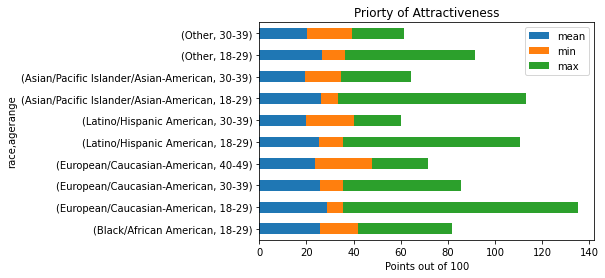

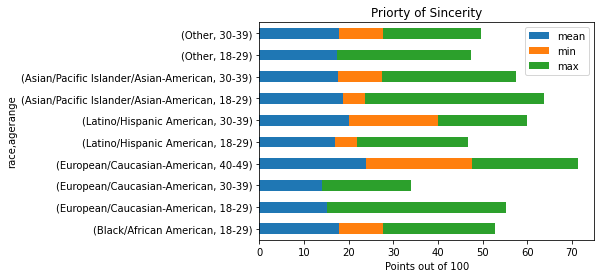

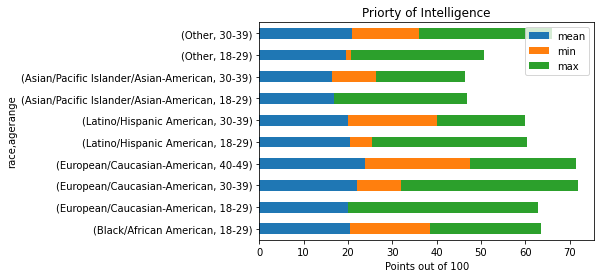

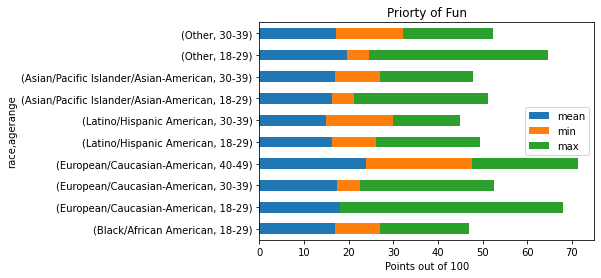

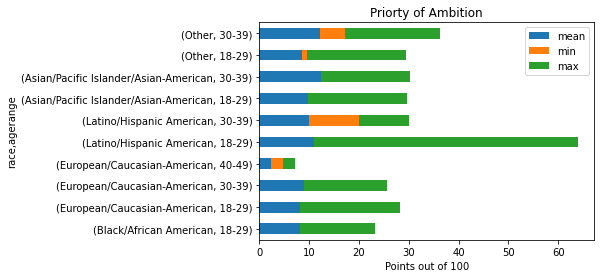

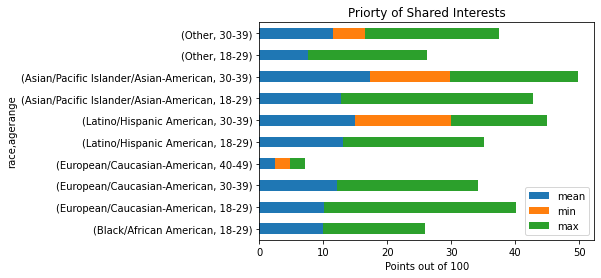

In [8]:
a_e_m.plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priorty of Attractiveness").set_xlabel('Points out of 100')
a_e_m.plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priorty of Sincerity").set_xlabel('Points out of 100')
a_e_m.plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priorty of Intelligence").set_xlabel('Points out of 100')
a_e_m.plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priorty of Fun").set_xlabel('Points out of 100')
a_e_m.plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priorty of Ambition").set_xlabel('Points out of 100')
a_e_m.plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priorty of Shared Interests").set_xlabel('Points out of 100')


In [9]:
wfm = females_.drop_duplicates('iid').groupby('race')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max'])

wfm1 = wfm.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
wfm1

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


attr1_1                sinc1_1        \
                                            mean   min   max       mean   min   
race                                                                            
Black/African American                 19.350625  10.0  50.0  16.060000   5.0   
European/Caucasian-American            17.843262   5.0  50.0  17.608156   0.0   
Latino/Hispanic American               19.278400   0.0  50.0  18.715600  10.0   
Asian/Pacific Islander/Asian-American  17.531972   2.0  90.0  19.517887   0.0   
Other                                  18.682667   5.0  50.0  18.650625   3.0   

                                               intel1_1              \
                                         max       mean   min   max   
race                                                                  
Black/African American                 21.74  18.783750  10.0  35.0   
European/Caucasian-American            40.00  21.271560   5.0  50.0   
Latino/Hispanic American               32.00  22.465200  10.0  35.0   
Asian/Pacific Islander/Asian-American  60.00  20.442394   2.0  50.0   
Other                                  35.00  21.145625  10.0  50.0   

                                          fun1_1                 amb1_1       \
                                            mean   min   max       mean  min   
race                                                                           
Black/African American                 17.721250  10.0  30.0  15.580625  5.0   
European/Caucasian-American            17.970780   5.0  40.0  13.134043  0.0   
Latino/Hispanic American               15.863600   5.0  35.0  12.415200  0.0   
Asian/Pacific Islander/Asian-American  16.551549   0.0  30.0  12.059014  0.0   
Other                                  16.518125   5.0  30.0  11.275625  2.0   

                                                shar1_1             
                                         max       mean  min   max  
race                                                                
Black/African American                 30.00  12.504375  0.0  20.0  
European/Caucasian-American            20.00  12.243121  0.0  30.0  
Latino/Hispanic American               25.00  11.107500  0.0  30.0  
Asian/Pacific Islander/Asian-American  20.00  13.898028  0.0  30.0  
Other                                  20.41  13.958125  5.0  20.0

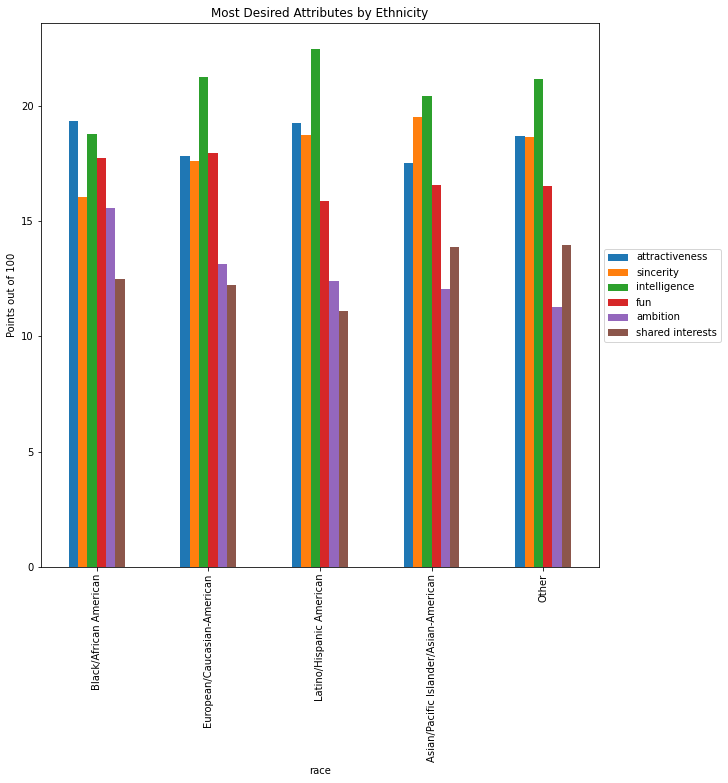

In [10]:
#stacking my dataframe nicely to give me just the mean of each attribute
idx = pd.IndexSlice
mean_w = wfm1.loc[:,idx[:,'mean']] 
mean_w.stack()

#plot
attr_m = mean_w.plot(kind='bar', figsize = (10,10), title = "Most Desired Attributes by Ethnicity").set_ylabel('Points out of 100')
plt.legend(['attractiveness','sincerity','intelligence','fun','ambition','shared interests'],loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


Text(0.5, 0, 'Points out of 100')

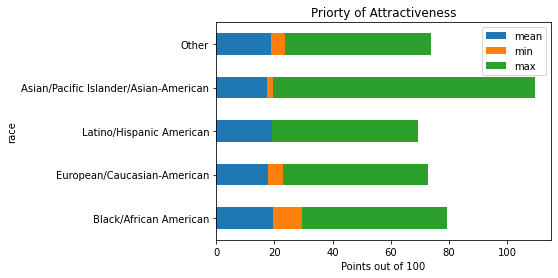

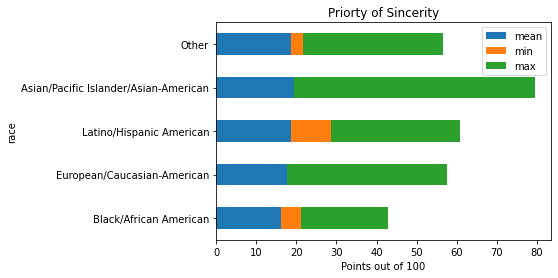

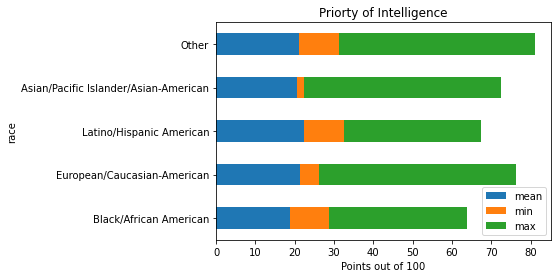

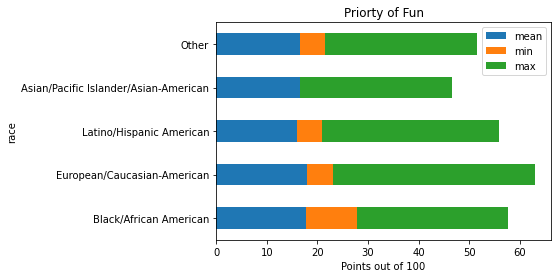

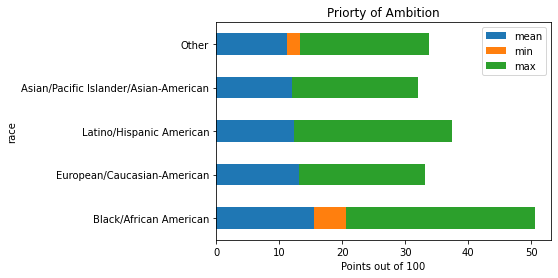

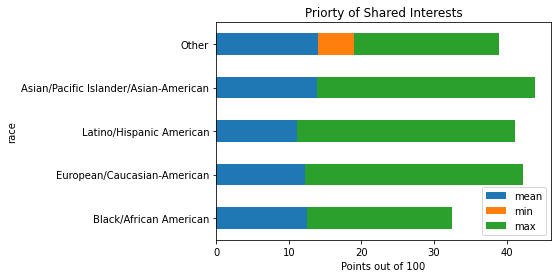

In [11]:
wfm1.plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priorty of Attractiveness").set_xlabel('Points out of 100')
wfm1.plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priorty of Sincerity").set_xlabel('Points out of 100')
wfm1.plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priorty of Intelligence").set_xlabel('Points out of 100')
wfm1.plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priorty of Fun").set_xlabel('Points out of 100')
wfm1.plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priorty of Ambition").set_xlabel('Points out of 100')
wfm1.plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priorty of Shared Interests").set_xlabel('Points out of 100')


In [12]:
males_ = data[data['gender'] == 1]
mfm = males_.drop_duplicates('iid').groupby('race')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max'])
mfm1 = mfm.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
mfm1

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


attr1_1                  sinc1_1  \
                                            mean    min    max       mean   
race                                                                        
Black/African American                 25.700000  16.00   40.0  17.800000   
European/Caucasian-American            28.369074   6.67  100.0  15.173951   
Latino/Hispanic American               25.125882  10.00   75.0  17.027647   
Asian/Pacific Islander/Asian-American  25.708615   7.00   80.0  18.650781   
Other                                  25.353810  10.00   55.0  17.432857   

                                                    intel1_1               \
                                        min   max       mean   min    max   
race                                                                        
Black/African American                 10.0  25.0  20.500000  18.0  25.00   
European/Caucasian-American             0.0  40.0  20.189815   0.0  42.86   
Latino/Hispanic American                5.0  25.0  20.331765   5.0  35.00   
Asian/Pacific Islander/Asian-American   5.0  40.0  16.785538   0.0  30.00   
Other                                   0.0  30.0  19.909048   1.0  30.00   

                                          fun1_1                  amb1_1       \
                                            mean   min    max       mean  min   
race                                                                            
Black/African American                 17.000000  10.0  20.00   8.200000  0.0   
European/Caucasian-American            18.087654   0.0  50.00   8.193168  0.0   
Latino/Hispanic American               16.155294  10.0  23.26  10.951176  0.0   
Asian/Pacific Islander/Asian-American  16.349375   5.0  30.00   9.923437  0.0   
Other                                  19.210952   5.0  40.00   9.217619  1.0   

                                               shar1_1             
                                        max       mean  min   max  
race                                                               
Black/African American                 15.0   9.900000  0.0  16.0  
European/Caucasian-American            20.0  10.285901  0.0  30.0  
Latino/Hispanic American               53.0  13.233529  0.0  22.0  
Asian/Pacific Islander/Asian-American  20.0  13.137031  0.0  30.0  
Other                                  20.0   8.399524  0.0  21.0

Text(0.5, 0, 'Points out of 100')

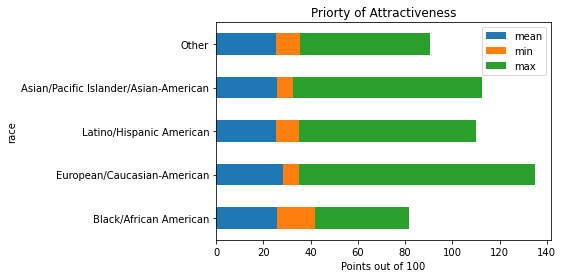

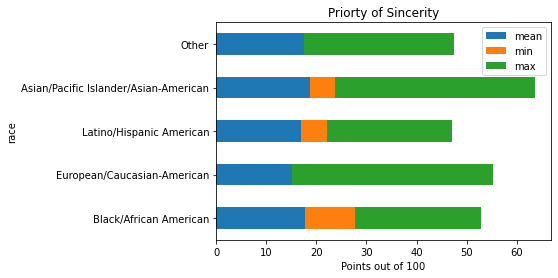

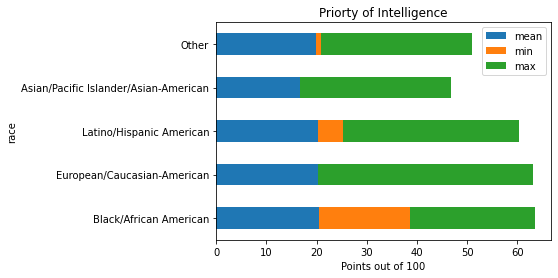

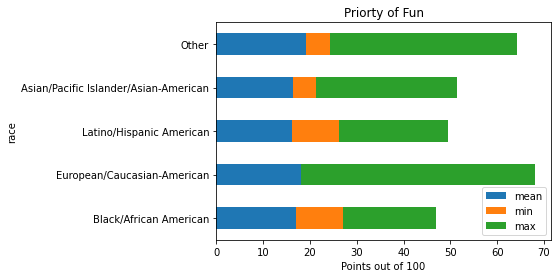

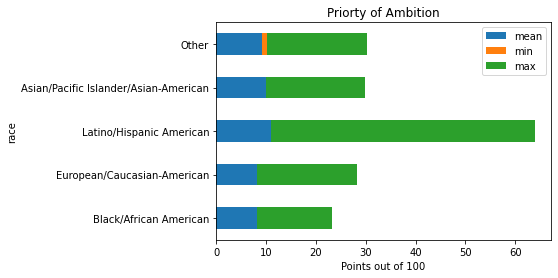

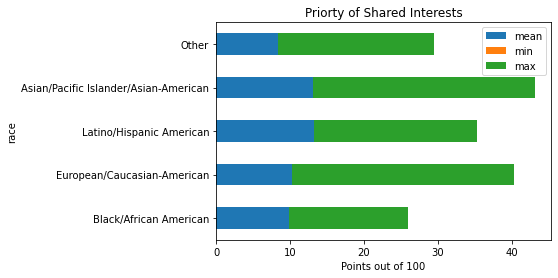

In [13]:
mfm1.plot(kind = 'barh', y = "attr1_1", stacked = True, title = "Priorty of Attractiveness").set_xlabel('Points out of 100')
mfm1.plot(kind = 'barh', y = "sinc1_1", stacked = True, title = "Priorty of Sincerity").set_xlabel('Points out of 100')
mfm1.plot(kind = 'barh', y = "intel1_1", stacked = True, title = "Priorty of Intelligence").set_xlabel('Points out of 100')
mfm1.plot(kind = 'barh', y = "fun1_1", stacked = True, title = "Priorty of Fun").set_xlabel('Points out of 100')
mfm1.plot(kind = 'barh', y = "amb1_1", stacked = True, title = "Priorty of Ambition").set_xlabel('Points out of 100')
mfm1.plot(kind = 'barh', y = "shar1_1", stacked = True, title = "Priorty of Shared Interests").set_xlabel('Points out of 100')
